In [1]:
import pandas as pd
file_path = r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\Fraud.csv"

df = pd.read_csv(file_path)

print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

missing_values_filtered = missing_values[missing_values > 0]
print("\nColumns with missing values:\n", missing_values_filtered)

Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Columns with missing values:
 Series([], dtype: int64)


In [3]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]

print("\nNumber of outliers:", outliers.shape[0])


Number of outliers: 338078


In [4]:
# Cap the outliers
df['amount'] = df['amount'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)



In [5]:
# Cap the outliers
df['oldbalanceOrg'] = df['oldbalanceOrg'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


In [6]:
Q1 = df['oldbalanceDest'].quantile(0.25)
Q3 = df['oldbalanceDest'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['oldbalanceDest'] < lower_bound) | (df['oldbalanceDest'] > upper_bound)]
print("\nNumber of outliers:", outliers.shape[0])


Number of outliers: 786135


In [7]:
# Cap the outliers
df['newbalanceOrig'] = df['newbalanceOrig'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
df['newbalanceDest'] = df['newbalanceDest'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_23064\2181178738.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


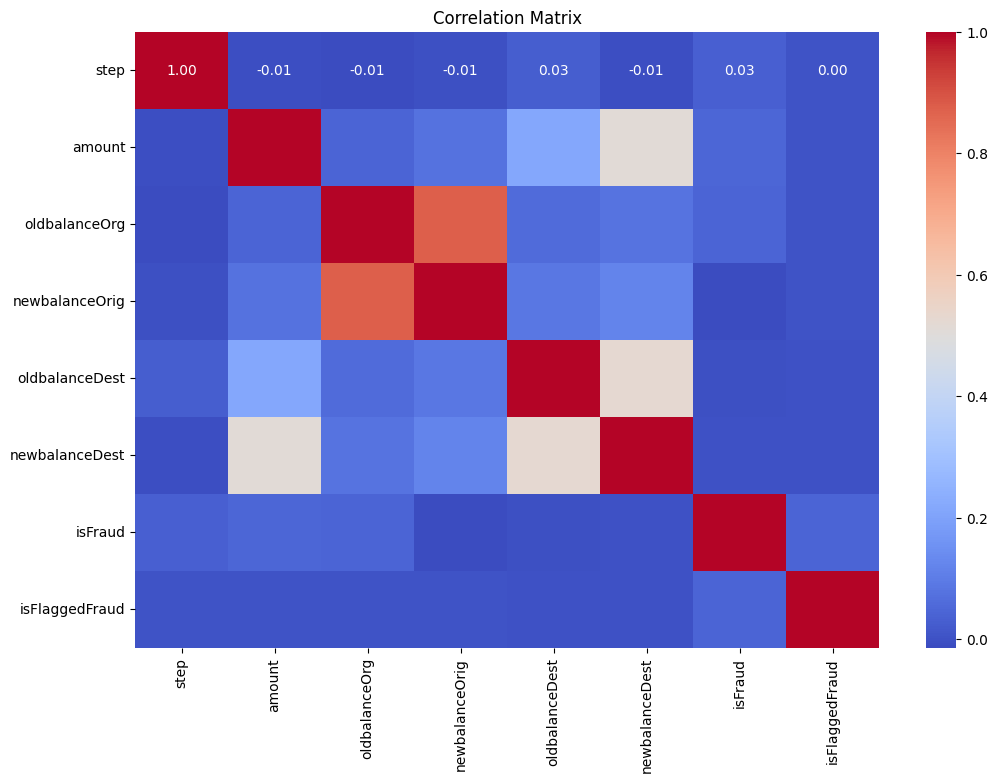

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [9]:
matching_transactions = df[df['nameOrig'] == df['nameDest']]

# Display the matching transactions
print("Number of transactions where nameOrig and nameDest are the same:", matching_transactions.shape[0])
print(matching_transactions.head())

Number of transactions where nameOrig and nameDest are the same: 0
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [10]:
#since none of them is same, we drop these columns

data = df.drop(columns=['nameOrig', 'nameDest', 'step'])
print(data.head())

       type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   PAYMENT   9839.64       170136.0       160296.36             0.0   
1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2  TRANSFER    181.00          181.0            0.00             0.0   
3  CASH_OUT    181.00          181.0            0.00         21182.0   
4   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


In [11]:
#onehotencoding

newdata = pd.get_dummies(data, columns=['type'])
print(newdata.head())


     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0   9839.64       170136.0       160296.36             0.0             0.0   
1   1864.28        21249.0        19384.72             0.0             0.0   
2    181.00          181.0            0.00             0.0             0.0   
3    181.00          181.0            0.00         21182.0             0.0   
4  11668.14        41554.0        29885.86             0.0             0.0   

   isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0        0               0             0              0           0   
1        0               0             0              0           0   
2        1               0             0              0           0   
3        1               0             0              1           0   
4        0               0             0              0           0   

   type_PAYMENT  type_TRANSFER  
0             1              0  
1             1              0  
2    

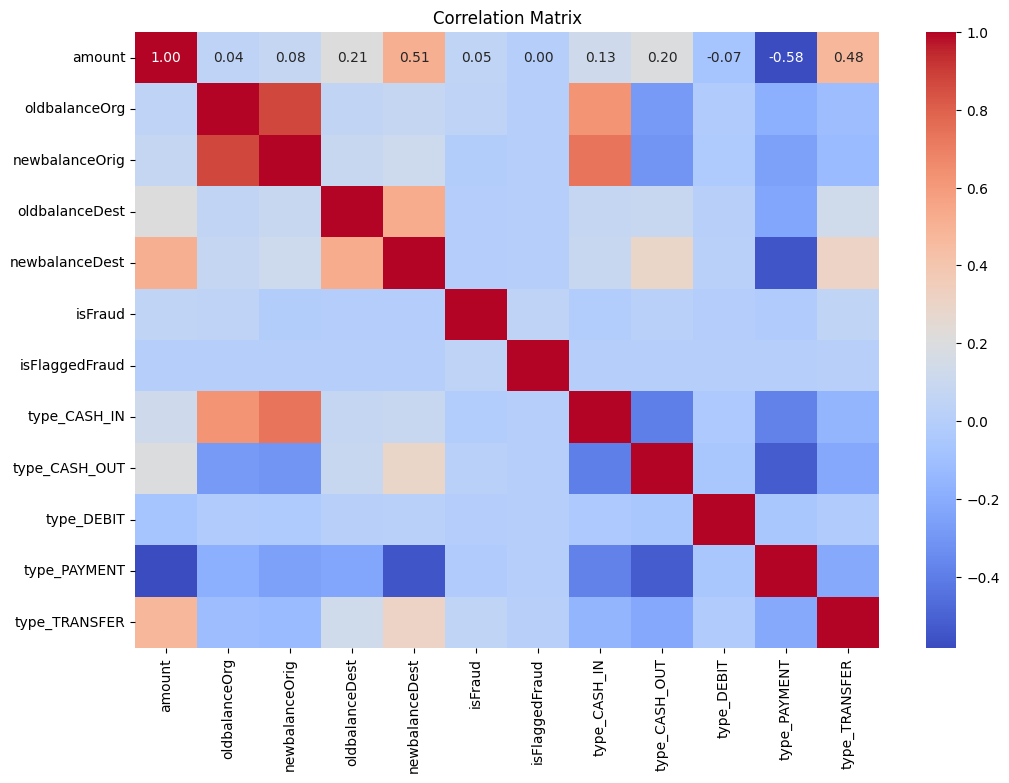

In [12]:

corr_matrix = newdata.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
             'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
             'isFlaggedFraud']
target = 'isFraud'

X = newdata[features]
y = newdata[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.94      0.48      0.64      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.74      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9993029601013419


In [15]:
coefficients = log_reg.coef_[0]
for feature, coef in zip(features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: amount, Coefficient: -0.0003756343619072017
Feature: oldbalanceOrg, Coefficient: 0.00037580233912570555
Feature: newbalanceOrig, Coefficient: -0.0005741527377176014
Feature: oldbalanceDest, Coefficient: -4.870891295808746e-08
Feature: newbalanceDest, Coefficient: -1.4861121521879057e-06
Feature: type_CASH_IN, Coefficient: -9.698463768362049e-10
Feature: type_CASH_OUT, Coefficient: -1.0258390515217286e-08
Feature: type_DEBIT, Coefficient: -2.1121996995886916e-09
Feature: type_PAYMENT, Coefficient: -2.6190943135377585e-07
Feature: type_TRANSFER, Coefficient: 1.965200203458371e-09
Feature: isFlaggedFraud, Coefficient: 1.2720172203990743e-11



Feature Importances (Coefficients):
            Feature   Coefficient
2   newbalanceOrig -5.741527e-04
1    oldbalanceOrg  3.758023e-04
0           amount -3.756344e-04
4   newbalanceDest -1.486112e-06
8     type_PAYMENT -2.619094e-07
3   oldbalanceDest -4.870891e-08
6    type_CASH_OUT -1.025839e-08
7       type_DEBIT -2.112200e-09
9    type_TRANSFER  1.965200e-09
5     type_CASH_IN -9.698464e-10
10  isFlaggedFraud  1.272017e-11


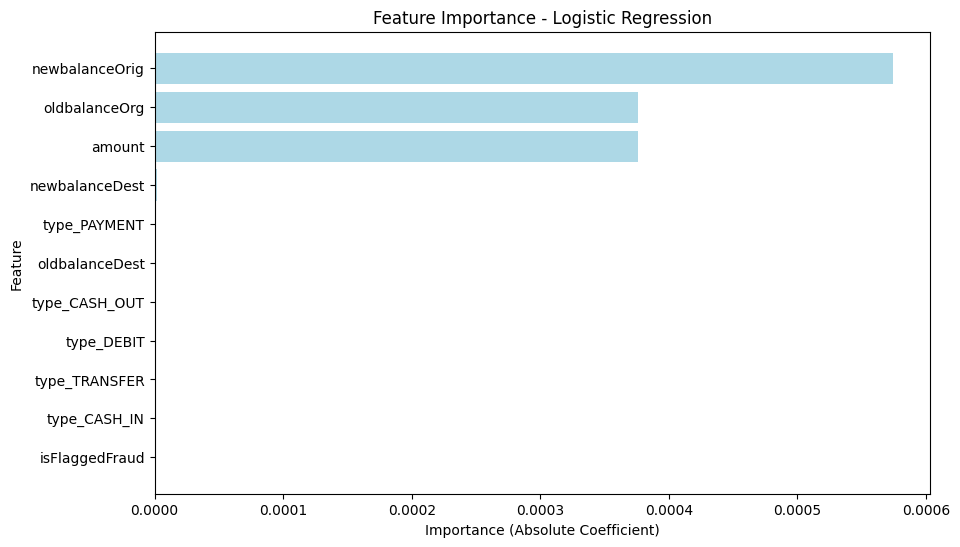

In [22]:
coefficients = log_reg.coef_[0]

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

feature_importance_df['Importance'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Coefficients):\n", feature_importance_df[['Feature', 'Coefficient']])

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [16]:
#isflaggedfraud is seen to be a major contributing factor acc to this model

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
            'isFlaggedFraud']
target = 'isFraud'

X = newdata[features]
y = newdata[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.89      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524

Accuracy Score: 0.9997312427899199



Feature Importances:
            Feature  Importance
4   newbalanceDest    0.271577
1    oldbalanceOrg    0.202720
2   newbalanceOrig    0.177615
0           amount    0.132423
6    type_CASH_OUT    0.115760
3   oldbalanceDest    0.087081
9    type_TRANSFER    0.012823
5     type_CASH_IN    0.000000
7       type_DEBIT    0.000000
8     type_PAYMENT    0.000000
10  isFlaggedFraud    0.000000


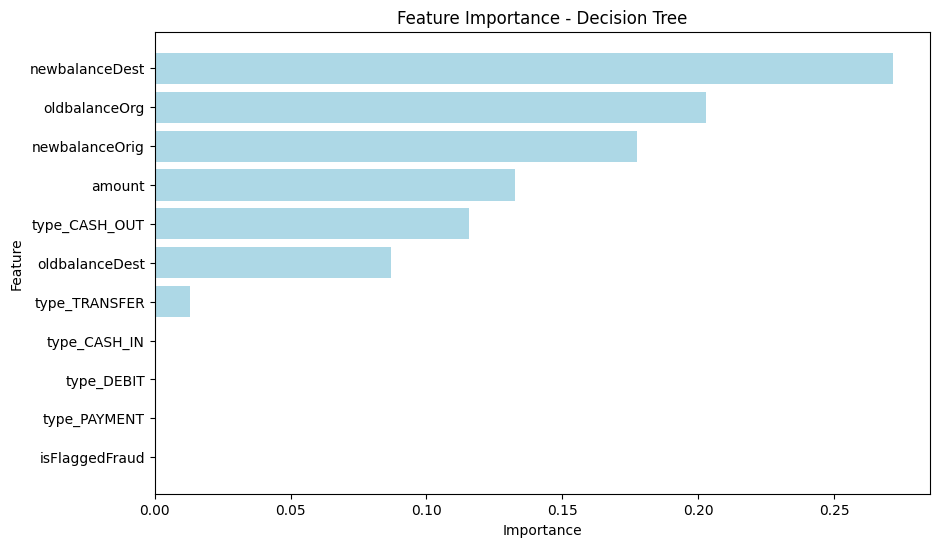

In [19]:
importances = dt_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance DataFrame
print("\nFeature Importances:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = newdata.drop(columns=['isFraud'])

y = newdata['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.80      0.85      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

XGBoost Accuracy: 0.9996510871307732



Feature Importances:
            Feature  Importance
7    type_CASH_OUT    0.444946
2   newbalanceOrig    0.278205
4   newbalanceDest    0.088824
10   type_TRANSFER    0.051504
1    oldbalanceOrg    0.051460
0           amount    0.029621
9     type_PAYMENT    0.022681
3   oldbalanceDest    0.017221
5   isFlaggedFraud    0.013869
6     type_CASH_IN    0.001670
8       type_DEBIT    0.000000


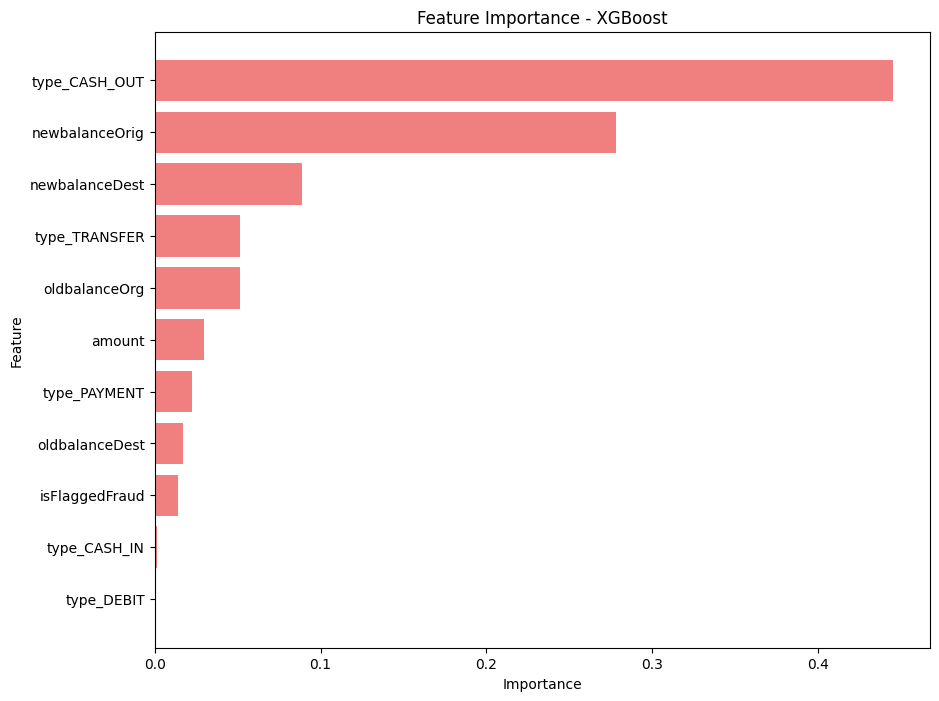

In [23]:
# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for feature importances
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance DataFrame
print("\nFeature Importances:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [24]:
'''
EXPLAINATION
1. Data cleaning including missing values, outliers and multi-collinearity. 
DONE-no missing values, outliers detected and treated

2. Describe your fraud detection model in elaboration. 
-Logistic regression estimates the likelihood that a transaction is fraudulent, 
returning values between 0 and 1. This is particularly useful in fraud detection 
since the output can be used as a probability to assess the likelihood of fraud.
Fraud detection is a binary classification problem, 
and logistic regression is well-suited to such tasks, especially when the relationship between variables is linear.
-The decision tree evaluates each transaction's features, making decisions based on conditions, 
to classify the transaction as fraudulent or not.
Decision trees are non-linear and can capture complex patterns between variables, 
which can be highly beneficial when detecting fraud, which may involve complex decision rules.
-XGBoost aggregates several decision trees, and with each iteration, it improves upon the errors made by the previous trees. 
It is especially adept at handling imbalanced data like fraud detection.
Fraud detection often benefits from ensemble models because of the complexity and variability in 
fraudulent transactions. XGBoost, being highly efficient, works well with large datasets and 
effectively handles non-linearity and multicollinearity.

3. How did you select variables to be included in the model?
The names of sender and recepient accounts were not same and not of much use so were dropped.
Steps was also dropped.
All the other variables/features were included in the model as they significantly conritbuted towards predicting if the 
transaction is fraud or not.

4. Demonstrate the performance of the model by using best set of tools. 
Classification report was found for all the models, accuracies of whose are shown below:
Logistic Regression: 99.93%
Decision Tree: 99.97%
XGBoost: 99.96%

5. What are the key factors that predict fraudulent customer? 
Type Cash out, new balance destination, new balance original, and flagged fraudulent

6. Do these factors make sense? If yes, How? If not, How not?
Yes definitely
Type Cash Out: Fraudsters typically transfer stolen funds to their accounts and then perform "cash-out" transactions to withdraw the funds.
New Balance Destination: Fraudulent transactions often involve transfers where the recipient's account (new balance destination) shows abnormal patterns often leading to suspicious behavior.
New Balance Original: The original balance before a transaction can indicate a customer's spending pattern. Drastic changes in this balance might indicate an attempt to deplete funds during fraud.
Flagged Fraudulent: Transactions flagged as suspicious by the system are already under scrutiny for exceeding certain thresholds or exhibiting behavior patterns commonly associated with fraud.

7. What kind of prevention should be adopted while company update its infrastructure?
-Prevention Strategies:
Real-time Monitoring
Enhanced Authentication
Fraud Detection Algorithms
User Education

8. Assuming these actions have been implemented, how would you determine if they work?
Evaluation of Prevention Measures:
Metrics Tracking
Model Performance
Fraud Trends 
Feedback Loop

'''

'\nEXPLAINATION\n1. Data cleaning including missing values, outliers and multi-collinearity. \nDONE-no missing values, outliers detected and treated\n\n2. Describe your fraud detection model in elaboration. \n-Logistic regression estimates the likelihood that a transaction is fraudulent, \nreturning values between 0 and 1. This is particularly useful in fraud detection \nsince the output can be used as a probability to assess the likelihood of fraud.\nFraud detection is a binary classification problem, \nand logistic regression is well-suited to such tasks, especially when the relationship between variables is linear.\n-The decision tree evaluates each transaction\'s features, making decisions based on conditions, \nto classify the transaction as fraudulent or not.\nDecision trees are non-linear and can capture complex patterns between variables, \nwhich can be highly beneficial when detecting fraud, which may involve complex decision rules.\n-XGBoost aggregates several decision trees,